In [76]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [77]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/mark/.keras/datasets/iris_training.csv


In [78]:
# CSV文件中列的顺序
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [79]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [80]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.1, 5.5, 6.4, 7.2, 4.7, 5.9, 5.2, 5. , 5.5, 5.7, 6.1, 5.5, 4.8,
       5.9, 7.7, 6.4, 5.8, 5.4, 5. , 6.4, 6.7, 4.5, 6.7, 6.1, 5. , 7.6,
       6. , 5.4, 5.6, 6.6, 6.1, 4.8], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 2.4, 2.8, 3. , 3.2, 3. , 3.5, 3.4, 2.6, 2.9, 2.6, 3.5, 3.1,
       3.2, 3. , 3.1, 2.6, 3.9, 3.5, 2.7, 3.1, 2.3, 3. , 2.9, 3.6, 3. ,
       3. , 3.4, 2.7, 2.9, 2.8, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 3.8, 5.6, 5.8, 1.3, 5.1, 1.5, 1.5, 4.4, 4.2, 5.6, 1.3, 1.6,
       4.8, 6.1, 5.5, 4. , 1.3, 1.6, 5.3, 4.4, 1.3, 5. , 4.7, 1.4, 6.6,
       4.8, 1.5, 4.2, 4.6, 4.7, 1.4], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.1, 2.2, 1.6, 0.2, 1.8, 0.2, 0.2, 1.2, 1.3, 1.4, 0.2, 0.2,
       1.8, 2.3, 1.8, 1.2, 0.4, 0.6, 1.9, 1.4, 0.3, 1.7, 1.4,

In [81]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels 

In [82]:
train_dataset = train_dataset.map(pack_features_vector)

In [83]:
features, labels = next(iter(train_dataset))

In [84]:
features

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[7.2, 3. , 5.8, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [4.8, 3. , 1.4, 0.1],
       [6.7, 3. , 5.2, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.7, 4.1, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.8, 4. , 1.2, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3.3, 5.7, 2.1],
       [5.7, 2.8, 4.1, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.1],
       [5. , 3.4, 1.5, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [6. , 2.7, 5.1, 1.6],
       [5.3, 3.7, 1.5, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [6.3, 2.3, 4.4, 1.3]], dtype=float32)>

In [108]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 0, 2, 1, 1], dtype=int32)>

In [85]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # 需要给出输入的形式
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [86]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [87]:
def loss(model, x, y):
  y_ = model(x)
  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.5034847259521484


In [88]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


In [90]:
## Note: 使用相同的模型变量重新运行此单元

# 保留结果用于绘制
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # 优化模型
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 追踪进度
    epoch_loss_avg(loss_value)  # 添加当前的 batch loss
    # 比较预测标签与真实标签
    epoch_accuracy(y, model(x))

  # 循环结束
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(),
epoch_accuracy.result()))

Epoch 000: Loss: 1.178, Accuracy: 35.000%
Epoch 050: Loss: 0.068, Accuracy: 97.500%
Epoch 100: Loss: 0.064, Accuracy: 97.500%
Epoch 150: Loss: 0.051, Accuracy: 98.333%
Epoch 200: Loss: 0.046, Accuracy: 98.333%


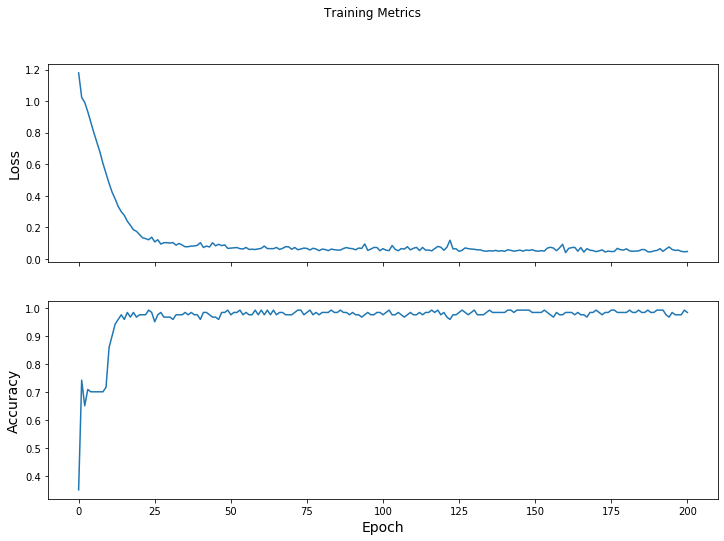

In [91]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [92]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"


In [93]:
test_fp = tf.keras.utils.get_file(
    fname=os.path.basename(test_url),
    origin=test_url
)

In [94]:
test_fp

'/home/mark/.keras/datasets/iris_test.csv'

In [95]:
test_dateset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False
)

In [96]:
test_dateset

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [97]:
test_dateset = test_dateset.map(pack_features_vector)

In [98]:
test_dateset

<MapDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>

In [100]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dateset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [101]:
prediction

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 2, 1], dtype=int32)>

In [102]:
y

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 2, 1], dtype=int32)>

In [103]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [104]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])


In [105]:
predictions = model(predict_dataset)

In [106]:
predictions

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 11.866571 ,   5.199118 , -25.841095 ],
       [ -5.7887144,   6.2264853,  -1.0506669],
       [-14.773615 ,   6.455664 ,  11.572941 ]], dtype=float32)>

In [107]:
for i , logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = column_names[class_idx]

    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: sepal_length (99.9%)
Example 1 prediction: sepal_width (99.9%)
Example 2 prediction: petal_length (99.4%)
